In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')

In [2]:
df = pd.read_csv('Wine.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


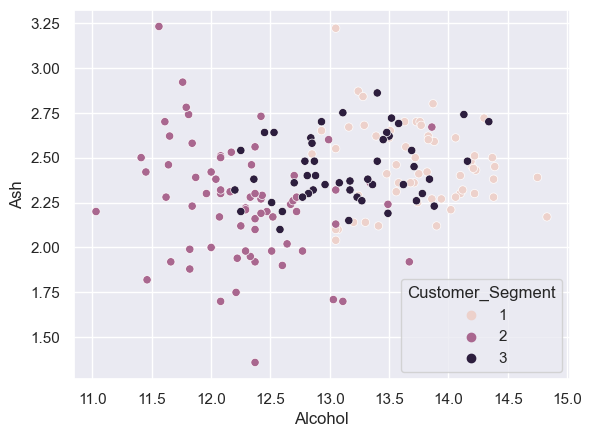

In [7]:
sns.scatterplot(df['Alcohol'],df['Ash'], hue = df['Customer_Segment'])
plt.show()

In [8]:
x = df.iloc[:,:-1]
y = df['Customer_Segment']

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
svc = SVC(kernel='poly')
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.704225352112676
0.6111111111111112


In [11]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
svc = SVC(kernel='poly')
svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.9859154929577465
0.9444444444444444


# Hyperparameter tuning

In [14]:
from sklearn.model_selection import GridSearchCV

In [ ]:
SVC()

In [15]:
params = {
    'C' : [0.1,0.001,0.0001,1,10],
    'kernel' : ['rbf','poly','linear'],
    'gamma' : [0.01,0.1,0.001,1,10]
}

In [18]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.0001, 1, 10],
                         'gamma': [0.01, 0.1, 0.001, 1, 10],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=1)

In [19]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [20]:
svc = SVC(C=1, gamma=0.01, kernel='rbf')
svc.fit(xtrain,ytrain)
print(svc.score(xtrain,ytrain))
print(svc.score(xtest,ytest))

0.9929577464788732
1.0
